# 调用高德Web服务API文档内容

 下列为子功能的API调用

## 地理/逆地理编码

In [19]:
import pandas as pd
import requests
apikey ="e0f04ea75c614d5d9349161f075fae8b"

def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': apikey,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
广州动物园 = geocode(address='广东省广州市广州动物园')
print(广州动物园)
df_广州动物园地理编码 = pd.json_normalize(广州动物园['geocodes'])
display(df_广州动物园地理编码)
广州动物园地理编码 = 广州动物园['geocodes'][0]['location']
print("广州动物园地理编码:",广州动物园地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省广州市越秀区广州动物园', 'country': '中国', 'province': '广东省', 'citycode': '020', 'city': '广州市', 'district': '越秀区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440104', 'street': [], 'number': [], 'location': '113.305951,23.137890', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省广州市越秀区广州动物园,中国,广东省,020,广州市,越秀区,[],440104,[],[],"113.305951,23.137890",兴趣点,[],[],[],[]


广州动物园地理编码: 113.305951,23.137890


In [20]:
# 逆地理编码
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': apikey,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

广州动物园逆地理编码_base = regeocode(广州动物园地理编码)
广州动物园逆地理编码 = 广州动物园逆地理编码_base
print(广州动物园逆地理编码)
df_广州动物园逆地理编码 = pd.json_normalize(广州动物园逆地理编码).T
display(df_广州动物园逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '广州市', 'province': '广东省', 'adcode': '440104', 'district': '越秀区', 'towncode': '440104014000', 'streetNumber': {'number': '18大院', 'location': '113.30568,23.1373869', 'direction': '西南', 'distance': '62.4324', 'street': '云鹤南街'}, 'country': '中国', 'township': '黄花岗街道', 'businessAreas': [{'location': '113.305162,23.133857', 'name': '东风东', 'id': '440104'}, {'location': '113.310984,23.142444', 'name': '水荫', 'id': '440104'}, {'location': '113.277257,23.134706', 'name': '东风', 'id': '440104'}], 'building': {'name': '广州动物园', 'type': '风景名胜;公园广场;动物园'}, 'neighborhood': {'name': '广州动物园', 'type': '风景名胜;公园广场;动物园'}, 'citycode': '020'}, 'formatted_address': '广东省广州市越秀区黄花岗街道广州动物园'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,广州市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440104
regeocode.addressComponent.district,越秀区
regeocode.addressComponent.towncode,440104014000
regeocode.addressComponent.streetNumber.number,18大院
regeocode.addressComponent.streetNumber.location,"113.30568,23.1373869"


In [21]:
广州动物园逆地理编码_all = regeocode(广州动物园地理编码,extensions="all")
print(广州动物园逆地理编码_all)
df_广州动物园逆地理编码_all = pd.json_normalize(广州动物园逆地理编码_all)
display(df_广州动物园逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '020F49F011043614831', 'location': '113.305,23.1374', 'direction': '东北', 'name': '云鹤南街', 'distance': '84.9942'}, {'id': '020F49F01104324540', 'location': '113.305,23.1381', 'direction': '东', 'name': '云鹤北街', 'distance': '94.7009'}, {'id': '020F49F011042383', 'location': '113.308,23.1377', 'direction': '西', 'name': '内环路', 'distance': '203.901'}], 'roadinters': [{'second_name': '云鹤南街', 'first_id': '020F49F01104324540', 'second_id': '020F49F011043614831', 'location': '113.3050567,23.13811083', 'distance': '94.7009', 'first_name': '云鹤北街', 'direction': '东'}], 'formatted_address': '广东省广州市越秀区黄花岗街道广州动物园', 'addressComponent': {'city': '广州市', 'province': '广东省', 'adcode': '440104', 'district': '越秀区', 'towncode': '440104014000', 'streetNumber': {'number': '18大院', 'location': '113.30568,23.1373869', 'direction': '西南', 'distance': '62.4324', 'street': '云鹤南街'}, 'country': '中国', 'township': '黄花岗街道', 'businessAreas': [{'location': '113.305162,23.133857', 'n

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '020F49F011043614831', 'location': '11...","[{'second_name': '云鹤南街', 'first_id': '020F49F0...",广东省广州市越秀区黄花岗街道广州动物园,广州市,广东省,440104,越秀区,...,中国,黄花岗街道,"[{'location': '113.305162,23.133857', 'name': ...",广州动物园,风景名胜;公园广场;动物园,广州动物园,风景名胜;公园广场;动物园,020,"[{'area': '291548.033829', 'type': '110102', '...","[{'id': 'B00140UEO1', 'direction': '北', 'busin..."


* 地理编码/逆地理编码 API是通过 HTTP/HTTPS 协议访问远程服务的接口，提供结构化地址与经纬度之间的相互转化的能力，使用时详细的结构化地址和高德经纬度坐标之间转换，在此过程中用户获取数据只是进行了数据交换，因此我认为他没有含有ML和AI的功能。

---

## 路径规划 

In [22]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':apikey,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [23]:
广州动物园 = geocode('广东省广州市广州动物园')
爱群大厦 = geocode('广东省广州市爱群大厦')
广州动物园_location = 广州动物园['geocodes'][0]['location']
爱群大厦_location = 爱群大厦['geocodes'][0]['location']
print("(起点)爱群大厦_location:",爱群大厦_location,"(终点)广州动物园_location:",广州动物园_location)

(起点)爱群大厦_location: 113.257158,23.109471 (终点)广州动物园_location: 113.305951,23.137890


In [24]:
爱群大厦_广州动物园 = walking(爱群大厦_location,广州动物园_location)
df_步行路径规划 = pd.json_normalize(爱群大厦_广州动物园["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,沿沿江西路向东北步行1167米直行,东北,沿江西路,1167,934,"113.257188,23.109397;113.257622,23.109566;113....",直行,[],0
1,沿沿江中路向东步行1205米左转,东,沿江中路,1205,964,"113.267582,23.113859;113.268576,23.114245;113....",左转,[],0
2,沿东沙角路向北步行321米右转,北,东沙角路,321,257,"113.279149,23.115269;113.279171,23.115668;113....",右转,[],0
3,沿越秀南路向东步行92米左转,东,越秀南路,92,74,"113.27947,23.118173;113.279983,23.118155;113.2...",左转,[],0
4,沿筑溪西街向东北步行675米左转,东北,筑溪西街,675,540,"113.280369,23.118147;113.280378,23.118589;113....",左转,[],0
5,沿东川路向北步行21米右转,北,东川路,21,17,"113.285842,23.120516;113.285872,23.120712",右转,[],0
6,沿牛乳基向东步行204米向左前方行走,东,牛乳基,204,163,"113.285872,23.120712;113.286007,23.120712;113....",向左前方行走,[],0
7,沿东华南路向东北步行138米向左前方行走,东北,东华南路,138,110,"113.287878,23.120569;113.288451,23.120933;113....",向左前方行走,[],0
8,沿东华南路步行25米右转,[],东华南路,25,20,"113.288997,23.121293;113.289062,23.121402;113....",右转,[],0
9,步行47米向左前方行走,[],[],47,38,"113.289062,23.121502;113.28951,23.121597",向左前方行走,[],1


0        沿沿江西路向东北步行1167米直行
1         沿沿江中路向东步行1205米左转
2          沿东沙角路向北步行321米右转
3           沿越秀南路向东步行92米左转
4         沿筑溪西街向东北步行675米左转
5            沿东川路向北步行21米右转
6       沿牛乳基向东步行204米向左前方行走
7     沿东华南路向东北步行138米向左前方行走
8             沿东华南路步行25米右转
9              步行47米向左前方行走
10        沿东华北路向东北步行531米左转
11                步行161米左转
12         沿农林下路向北步行815米右转
13         沿东风东路向东步行742米左转
14          沿东环路向北步行267米右转
15                步行111米左转
16         沿环市东路向东步行107米左转
17           向北步行351米到达目的地
Name: instruction, dtype: object

In [25]:
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':apikey,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# C-2 准备walking 参数
爱群大厦 = geocode('广东省广州市爱群大厦')
爱群大厦_location = 爱群大厦['geocodes'][0]['location']
广州动物园 = geocode('广东省广州市广州动物园')
广州动物园_location = 广州动物园['geocodes'][0]['location']
print("(起点)爱群大厦_location:",爱群大厦_location,"(终点)广州动物园_location:",广州动物园_location)

爱群大厦_广州动物园 = integrated(爱群大厦_location,广州动物园_location,city='广州',extensions='all')
df_bus = pd.json_normalize(爱群大厦_广州动物园)
df_bus

(起点)爱群大厦_location: 113.257158,23.109471 (终点)广州动物园_location: 113.305951,23.137890


,status,info,infocode,count,route.origin,route.destination,route.distance,route.taxi_cost,route.transits
0,1,OK,10000,5,"113.257158,23.109471","113.305951,23.137890",7428,22.812800000000003,"[{'cost': '3.0', 'duration': '1869', 'nightfla..."


In [26]:
pd.json_normalize(爱群大厦_广州动物园["route"]['transits'])

,cost,duration,nightflag,walking_distance,distance,missed,segments
0,3.0,1869,0,1047,7801,1,"[{'taxi': [], 'walking': {'origin': '113.25718..."
1,4.0,2476,0,765,9034,1,"[{'taxi': [], 'walking': {'origin': '113.25718..."
2,2.0,2899,0,1118,9115,1,"[{'taxi': [], 'walking': {'origin': '113.25718..."
3,5.0,2746,0,1420,7851,1,"[{'taxi': [], 'walking': {'origin': '113.25718..."
4,4.0,2879,0,770,7828,1,"[{'taxi': [], 'walking': {'origin': '113.25718..."


In [27]:
pd.json_normalize(爱群大厦_广州动物园["route"]['transits'][0]['segments'])

,taxi,exit,walking.origin,walking.destination,walking.distance,walking.duration,walking.steps,bus.buslines,entrance.name,entrance.location,railway.via_stops,railway.alters,railway.spaces,entrance,exit.name,exit.location
0,[],[],"113.257187,23.109396","113.257195,23.113033",499,427,"[{'instruction': '沿沿江西路步行112米左转', 'road': '沿江西...","[{'departure_stop': {'name': '一德路', 'id': '440...",A口,"113.257118,23.112888",[],[],[],NaN,NaN,NaN
1,[],NaN,"113.296829,23.133411","113.296730,23.134480",129,110,"[{'instruction': '步行129米到达区庄', 'road': [], 'di...","[{'departure_stop': {'name': '区庄', 'id': '4401...",NaN,NaN,[],[],[],[],B口,"113.307167,23.134945"
2,[],[],"113.307289,23.134501","113.306030,23.137648",419,359,"[{'instruction': '步行63米左转', 'road': [], 'dista...",[],NaN,NaN,[],[],[],[],NaN,NaN


In [28]:
df_bus_基本信息 = pd.json_normalize(爱群大厦_广州动物园["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_基本信息

,name,id,type,distance,duration,polyline,bustimetag,start_time,end_time,via_num,via_stops,departure_stop.name,departure_stop.id,departure_stop.location,arrival_stop.name,arrival_stop.id,arrival_stop.location
0,地铁6号线(浔峰岗--香雪),440100023054,地铁线路,5869,846,"113.257200,23.113036;113.257611,23.113144;113....",2,[],[],5,"[{'name': '海珠广场', 'id': '440100023054011', 'lo...",一德路,440100023054010,"113.257200,23.113036",区庄,440100023054016,"113.296837,23.133413"


In [29]:
_236路公交车 = pd.json_normalize(爱群大厦_广州动物园["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"_236路公交车"})
display(_236路公交车)

,_236路公交车,id,location
0,海珠广场,440100023054011,"113.265344,23.114796"
1,北京路,440100023054012,"113.270268,23.118730"
2,团一大广场,440100023054013,"113.278266,23.118111"
3,东湖,440100023054014,"113.288583,23.115102"
4,东山口,440100023054015,"113.295373,23.123980"


#### 思考 

* 路径规划根据返回线路数据，自行开发线路导航。以HTTP形式提供的步行、公交、驾车查询及行驶距离计算接口，返回JSON 或 XML格式的查询数据，用于实现路径规划功能的开发。因为完全基于算法来运行，因此其输入与输出都是结构化的数据格式。我认为他有ML和AI的功能。

---

## 行政区域查询 

In [30]:
def district(keywords:str):
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':apikey,
        'keywords':keywords,
        "subdistrict":"3",
        'output':'json'
    }
    r = requests.get(url,params=params)
    data = r.json()['districts'][0]['districts']
    print("---"+keywords + "有以下几个行政区域---")
    for i in data:
        print(i['name'])
    return
   

In [31]:
district('湖南')

---湖南有以下几个行政区域---
衡阳市
益阳市
岳阳市
娄底市
张家界市
常德市
湘西土家族苗族自治州
怀化市
长沙市
湘潭市
郴州市
永州市
株洲市
邵阳市


In [32]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':apikey,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='湖南',extensions='all',subdistrict=3)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_郴州市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'])
display(df_行政区域_1级,df_行政区域_2级_郴州市)

,citycode,adcode,name,center,level,districts
0,0734,430400,衡阳市,"112.607693,26.900358",city,"[{'citycode': '0734', 'adcode': '430423', 'nam..."
1,0737,430900,益阳市,"112.355042,28.570066",city,"[{'citycode': '0737', 'adcode': '430981', 'nam..."
2,0730,430600,岳阳市,"113.132855,29.37029",city,"[{'citycode': '0730', 'adcode': '430603', 'nam..."
3,0738,431300,娄底市,"112.008497,27.728136",city,"[{'citycode': '0738', 'adcode': '431381', 'nam..."
4,0744,430800,张家界市,"110.479921,29.127401",city,"[{'citycode': '0744', 'adcode': '430821', 'nam..."
5,0736,430700,常德市,"111.691347,29.040225",city,"[{'citycode': '0736', 'adcode': '430723', 'nam..."
6,0743,433100,湘西土家族苗族自治州,"109.739735,28.314296",city,"[{'citycode': '0743', 'adcode': '433101', 'nam..."
7,0745,431200,怀化市,"109.97824,27.550082",city,"[{'citycode': '0745', 'adcode': '431281', 'nam..."
8,0731,430100,长沙市,"112.982279,28.19409",city,"[{'citycode': '0731', 'adcode': '430105', 'nam..."
9,0732,430300,湘潭市,"112.944052,27.82973",city,"[{'citycode': '0732', 'adcode': '430321', 'nam..."


,citycode,adcode,name,center,level,districts
0,0735,431028,安仁县,"113.27217,26.708625",district,"[{'citycode': '0735', 'adcode': '431028', 'nam..."
1,0735,431081,资兴市,"113.23682,25.974152",district,"[{'citycode': '0735', 'adcode': '431081', 'nam..."
2,0735,431026,汝城县,"113.685686,25.553759",district,"[{'citycode': '0735', 'adcode': '431026', 'nam..."
3,0735,431027,桂东县,"113.945879,26.073917",district,"[{'citycode': '0735', 'adcode': '431027', 'nam..."
4,0735,431023,永兴县,"113.114819,26.129392",district,"[{'citycode': '0735', 'adcode': '431023', 'nam..."
5,0735,431002,北湖区,"113.032208,25.792628",district,"[{'citycode': '0735', 'adcode': '431002', 'nam..."
6,0735,431003,苏仙区,"113.038698,25.793157",district,"[{'citycode': '0735', 'adcode': '431003', 'nam..."
7,0735,431025,临武县,"112.564589,25.279119",district,"[{'citycode': '0735', 'adcode': '431025', 'nam..."
8,0735,431021,桂阳县,"112.734466,25.737447",district,"[{'citycode': '0735', 'adcode': '431021', 'nam..."
9,0735,431022,宜章县,"112.947884,25.394345",district,"[{'citycode': '0735', 'adcode': '431022', 'nam..."


#### 思考 

* 行政区域查询是通过下载相应的文档进行查找或通过插件DistrictSearch进行搜索查询。这两种方法无需使用推荐算法调用，仅是调用后台数据内容，所以我认为行政区域查询是不具备ML、AI的功能的。

---

## 搜索POI

In [33]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':apikey,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

place_text('博物馆','140100',city="广州市")

{'status': '1',
 'count': '114',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B00140WCET',
   'parent': [],
   'childtype': [],
   'name': '东濠涌博物馆',
   'type': '科教文化服务;博物馆;博物馆',
   'typecode': '140100',
   'biz_type': [],
   'address': '越秀北路78号(近东濠涌)',
   'location': '113.278747,23.128582',
   'tel': [],
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '广州市',
   'adname': '越秀区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B00140T14E',
   'parent': 'B00140BNNF',
   'childtype': '301',
   'name': '广州博物馆',
   'type': '科教文化服务;博物馆;博物馆',
   'typecode': '140100',
   'biz_type': [],
   'address': '镇海路镇海楼',
   'location': '113.265681,23.137726',
   'tel': '020-83550627',
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '广州市',
   'adname': '越秀区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos':

In [34]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':apikey,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

广州_音乐厅 = place_text('音乐厅','影剧院',city="广州市",children=1,extensions='all')
广州_音乐厅

{'status': '1',
 'count': '11',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B00140405A',
   'parent': [],
   'childtype': [],
   'name': '星海音乐厅',
   'tag': [],
   'type': '体育休闲服务;影剧院;音乐厅',
   'typecode': '080602',
   'biz_type': [],
   'address': '二沙岛晴波路33号',
   'location': '113.305775,23.10772',
   'tel': '020-87353869;020-37582476',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '020',
   'cityname': '广州市',
   'adcode': '440104',
   'adname': '越秀区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3413522421',
   'distance': [],
   'navi_poiid': 'F49F011043_62649',
   'entr_location': '113.30573,23.107238',
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-04-22 11:35:49',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [], 'truefloor'

In [35]:
df_广州_音乐厅 = pd.json_normalize(广州_音乐厅["pois"])
df_广州_音乐厅_星海音乐厅 = pd.json_normalize(广州_音乐厅["pois"][7]["children"])
display(df_广州_音乐厅,df_广州_音乐厅_星海音乐厅)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost,biz_ext.seat_ordering
0,B00140405A,[],[],星海音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],二沙岛晴波路33号,"113.305775,23.10772",...,[],"[{'id': ' B0FFG1PCXY ', 'name': ' 星海音乐厅(南门) ',...","[{'title': '外景图', 'url': 'http://store.is.auto...",[],[],[],[],4.6,[],0
1,B00140UEGB,B00140I4SW,309,星海音乐学院大学城校区音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],外环西路398号星海音乐学院大学城校区,"113.379926,23.059312",...,[],"[{'id': ' B00141UIFF ', 'name': ' 星海音乐学院大学城校区停...","[{'title': '内景图', 'url': 'http://store.is.auto...",[],[],[],[],5.0,80.00,0
2,B00140T2KN,B00140KZSR,309,华南理工大学音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],五山路381号,"113.349827,23.152275",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,[],0
3,B0FFI9QKM4,B00140HXYF,202,雅马哈mini音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],东风西路187号时代国际大厦二层,"113.253983,23.133111",...,[],[],[],[],[],[],[],[],[],0
4,B00141UBBQ,B00140KZTG,309,华南师范大学大学城校区音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],大学城外环西路378号华南师范大学大学城校区,"113.377652,23.056356",...,[],[],[],[],[],[],[],[],[],0
5,B0FFHE2UT8,B00140KZST,309,华南理工大学大学城校区音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],外环东路382号华南理工大学大学城校区,"113.404846,23.046123",...,[],[],[],[],[],[],[],[],[],0
6,B0FFLIQX8N,[],[],雅马哈智慧音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],黄埔大道西120号高志优托邦商场302,"113.339537,23.125958",...,[],[],[],[],[],[],[],[],[],0
7,B0FFK85TCU,[],[],贝森朵夫音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],越秀中路125号大院-1-3号,"113.277575,23.124741",...,[],[],[],[],[],[],[],[],[],0
8,B0FFIXSD3H,B00140WGV9,302,念琴音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],黄埔大道西188维加思广场四楼,"113.327171,23.125624",...,[],[],[],[],[],[],[],[],[],0
9,B0FFIB5NDU,B00141S2M6,309,星海音乐学院音乐厅,[],体育休闲服务;影剧院;音乐厅,080602,[],先烈东横路50号附近,"113.303871,23.149477",...,[],[],[],[],[],[],[],[],[],0


""


#### 思考 

* 搜索服务API提供多种查询POI信息的能力，其中包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。能对大型的数据集进行模式识别，以便对它们采取后继的分析和整理。所以我认为它背后是含有ML、AI的功能的。

---

## IP定位

In [36]:
def ip(ip:str):
    params= {
        'key':apikey,
        'ip':ip,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/ip?parameters", params)
    data = response.json()
    del data['status']
    del data['info']
    df = ["省份: %s"%(data['province']),"地区: %s"%(data['city']),"地理编码: %s"%(data['adcode']),"经纬度: %s"%(data['rectangle']),]
    print("ip:"+ip)
    for i in df:
        print(i)
    return

ip("113.108.182.52")

ip:113.108.182.52
省份: 广东省
地区: 广州市
地理编码: 440100
经纬度: 113.1017375,22.93212254;113.6770499,23.3809537


#### 思考 

* 我认为该功能只是为用户提供简单的搜索功能，其背后不需要用到ML、AI的功能

---

## 批量请求接口

In [37]:
import requests
import json
def batchrequest():  
    
    url = "https://restapi.amap.com/v3/batch?key=f49e1317bfd8f3f01e6c4f7a4037fd5c"
    params={
        "content-type":"application/json"
    }
    
    body = {
      "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=f49e1317bfd8f3f01e6c4f7a4037fd5c&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=f49e1317bfd8f3f01e6c4f7a4037fd5c&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
        ]
    }
    response = requests.post(url,params=params,data = json.dumps(body))
    data = response.json()
    return data
    
result = batchrequest()
result


[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

---

## 静态地图 

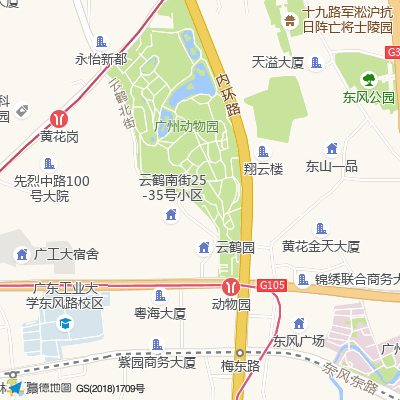

In [38]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':apikey,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
staticmap(location=广州动物园_location,zoom=14)

#### 思考 

* 静态地图服务涉及计算机视觉的功能，其用摄影机和电脑代替人眼对目标进行识别、跟踪和测量等机器视觉，并进一步做图形处理，使电脑处理成为更适合人眼观察或传送给仪器检测的图像。所以我认为他有ML、AI的功能

----

## 坐标转换

In [39]:
def assistant(locations:str,coordsys:str):
    params = {
        'key':apikey,
        'coordsys':coordsys,
        'locations': locations,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/coordinate/convert?parameters", params)
    data = response.json()['locations']
    return data
assistant("110.92499782059477,21.678348812949974|110.931788,21.684118",'gps')

'110.929509548612,21.675566677518;110.936314561632,21.681341688369'

#### 思考 

* 能够将用户输入的非高德坐标转换成高德坐标。它能调用其他的坐标并转化能高德坐标，我认为它是用了后台的算法将其转化

---

## 天气查询

In [40]:
def weather(city:str):
    params = {
        'key':apikey,
        'city':city,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/weather/weatherInfo?parameters", params)
    data = response.json()
    return data
weather('广州')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '广州市',
   'adcode': '440100',
   'weather': '雨',
   'temperature': '17',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '97',
   'reporttime': '2020-04-22 23:52:49'}]}

#### 思考 

* 天气查询是一个简单的HTTP接口，根据用户输入的adcode，查询目标区域当前/未来的天气情况。我认为这是简单的搜索查询，其背后不含有ML、AI的功能。

---

## 输入提示

In [41]:
def inputtips(keywords:str):
    params = {
        'key':apikey,
        'keywords':keywords,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/inputtips?parameters", params)
    data = response.json()
    return data
inputtips('广州')

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B00140WEW0',
   'name': '广州站',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.257331,23.149243',
   'address': '环市西路159号',
   'typecode': '150200',
   'city': []},
  {'id': 'B00140VAP3',
   'name': '广州南站',
   'district': '广东省广州市番禺区',
   'adcode': '440113',
   'location': '113.269114,22.988374',
   'address': '南站北路',
   'typecode': '150200',
   'city': []},
  {'id': 'B00140WBI1',
   'name': '广州塔',
   'district': '广东省广州市海珠区',
   'adcode': '440105',
   'location': '113.324553,23.106414',
   'address': '阅江西路222号',
   'typecode': '110200',
   'city': []},
  {'id': [],
   'name': '广州市',
   'district': '广东省广州市',
   'adcode': '440104',
   'location': [],
   'address': '越秀区',
   'typecode': '190104',
   'city': []},
  {'id': 'B00140TY64',
   'name': '广州东站',
   'district': '广东省广州市天河区',
   'adcode': '440106',
   'location': '113.324981,23.150597',
   'address': '东站路1号',
   'typecode': '1

#### 思考 

* 该功能提供根据用户输入的关键词查询返回建议列表。我认为这是简单的搜索查询，其背后不含有ML、AI的功能。

---

## 交通态势

In [42]:
def rectangle(rectangle:str):
    params = {
        'key':apikey,
        'rectangle':rectangle,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/traffic/status/rectangle?parameters", params)
    data = response.json()
    return data
rectangle('116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

#### 思考

* 我认为该功能有用到计算机视觉的功能，通过坐标点位到实际的地理位置，然后由图像处理、模式识别或图像识别、景物分析、图象理解等。

---

## 地理围栏

In [43]:
import requests
def creat_wl(name,center,radius,repeat='Mon',)->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key=317b2b98b27b266839553f10debb9b0f'
    params={
        'name':name,
        'center':center,
        'radius':radius,
        'repeat':repeat,
    }
    response = requests.post(url,json=params)
    data = response.json()
    return data
creat_wl('测试围栏','115.672126,38.817129',100)

{'data': {'message': '新增围栏已存在', 'status': '106'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

---

## 轨迹纠偏

In [44]:
def correct_error()->dict:
    url = 'https://restapi.amap.com/v4/grasproad/driving?key=317b2b98b27b266839553f10debb9b0f'
    params=[{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
}, {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]
    response = requests.post(url,json=params)
    data = response.json()
    return data
correct_error()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 设计一个简单的应用

* 应用设计：
 * 一款类似定向越野的打卡游戏app
* 设计理念：
 * 用户在游戏app中可以根据随机出现的打卡点定制自己的出发路线，app可以提供实时天气状况、交通态势等信息并给出路径规划以便用户参考，根据app提供打卡点附近的poi类型完成打卡任务进入下一个点。

* 涉及的功能：
 * 1.搜索POI（周边搜索）
 * 2.天气查询
 * 3.路径规划
 * 4.交通态势
 * 5.地理围栏